In [1]:
%load_ext rpy2.ipython

# 3.1: Multiple predictors

## Read the data

Data are in the *child.iq* directory of the ARM_Data download-- you might have
to change the path I use below to reflect the path on your computer.

In [2]:
%%R
# I had to import foreign to get access to read.dta
library("foreign")
kidiq <- read.dta("../../ARM_Data/child.iq/kidiq.dta")

# I won't attach kidiq-- i generally don't attach to avoid confusion(s)
#attach(kidiq)

Load the *arm* library-- see the Chapter 3.1 notebook if you need help.

In [6]:
%%R
library("arm")

## Regression-- two predictors

In [4]:
%%R
fit2 <- lm(kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq)
display(fit2)

lm(formula = kidiq$kid_score ~ kidiq$mom_hs + kidiq$mom_iq)
             coef.est coef.se
(Intercept)  25.73     5.88  
kidiq$mom_hs  5.95     2.21  
kidiq$mom_iq  0.56     0.06  
---
n = 434, k = 3
residual sd = 18.14, R-Squared = 0.21


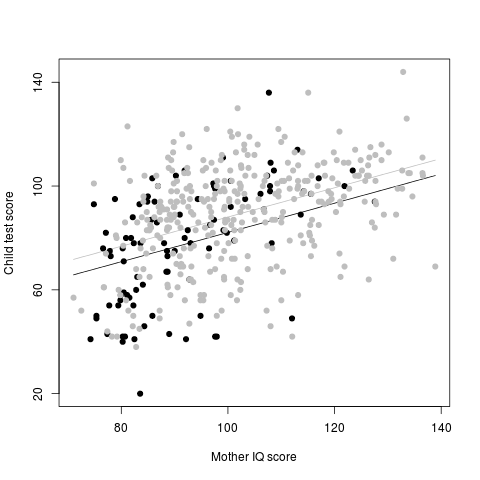

In [5]:
%%R
plot(kidiq$mom_iq, kidiq$kid_score,
     xlab="Mother IQ score", 
     ylab="Child test score",
     pch=20, xaxt="n", yaxt="n", type="n")
curve(coef(fit2)[1] + coef(fit2)[2] + coef(fit2)[3]*x, add=TRUE, col="gray")
curve(coef(fit2)[1] + coef(fit2)[3]*x, add=TRUE)
points(kidiq$mom_iq[kidiq$mom_hs==0],
       kidiq$kid_score[kidiq$mom_hs==0], pch=19)
points(kidiq$mom_iq[kidiq$mom_hs==1], 
       kidiq$kid_score[kidiq$mom_hs==1], col="gray", pch=19)
axis(1, c(80,100,120,140))
axis(2, c(20,60,100,140))